In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
df = pd.read_csv('spam_or_not_spam.csv')

In [128]:
df.head()

,email,class
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [129]:
X = list(df['email'])
y = list(df['class'])

In [130]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
knn.fit(X_train_dtm,y_train)
y_pred = knn.predict(X_test_dtm)

In [132]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)
print("Score: ",accuracy_score(y_pred, y_test)*100)

(2097, 24992)
(900, 24992)
Score:  96.0


In [140]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[723  18]
 [ 18 141]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       741
           1       0.89      0.89      0.89       159

    accuracy                           0.96       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.96      0.96      0.96       900



In [133]:
new=["FreeMsg Hey there free free free free free free free darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv"]
dtm = vect.transform(pd.Series(new))
if knn.predict(dtm)==1:
    print("This message is spam")
else:
    print("This message is not spam")

This message is spam


In [134]:
error = []
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_dtm, y_train)
    pred_i = knn.predict(X_test_dtm)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

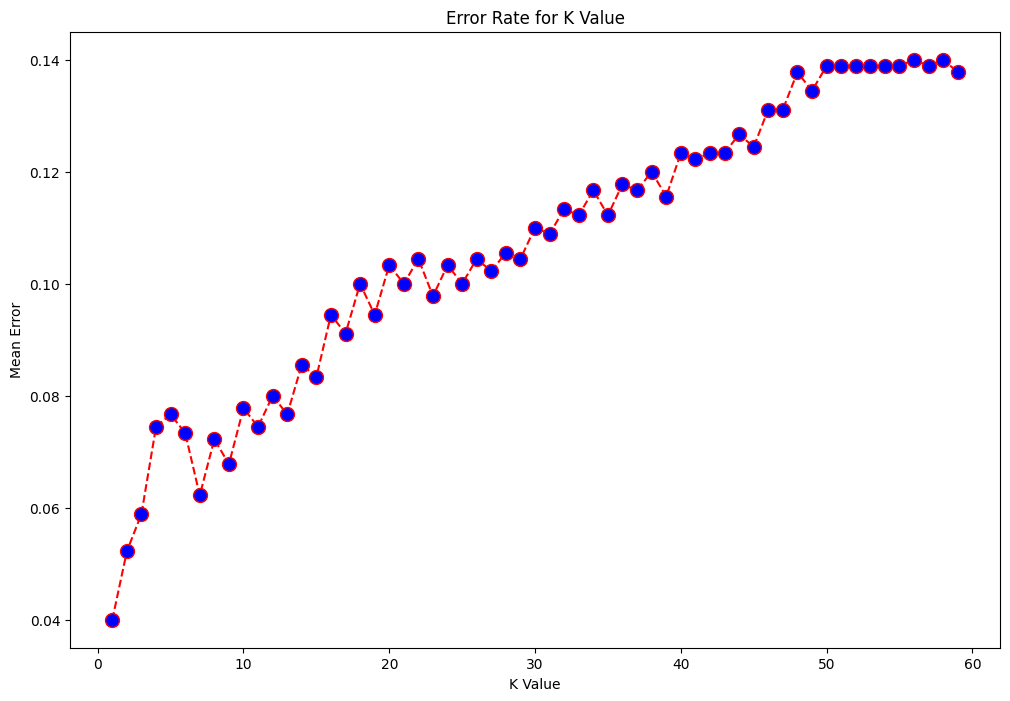

In [135]:
plt.figure(figsize=(12,8))
plt.plot(range(1,60), error, color="red", linestyle="dashed",
        marker="o",markerfacecolor="blue",markersize=10)
plt.title("Error Rate for K Value")
plt.xlabel("K Value") 
plt.ylabel("Mean Error")

In [136]:
k = np.random.randint(1,50,60)
params = {"n_neighbors" : k}
random_search = RandomizedSearchCV(KNeighborsClassifier(), params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search .fit(X_train, y_train)
print("train score - " + str(random_search .score(X_train, y_train)))
print("test score - " + str(random_search .score(X_test, y_test)))

C:\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Python\Python37\lib\site-packages\sklearn\neighbors\_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "C:\Python\Python37

ValueError: Expected 2D array, got 1D array instead:
array=[' eirikur hallgrimsson said let me ask you if you were on a rock in the middle of the atlantic mostly in the dark for half the year wouldn t you like a bit of internet distraction they ve already done the obvious and fiber ringed the island btw did they do the same as they did in ireland namely spend millions burying copious miles of dark fibre then neglect to provide any way of actually hooking it up to any isps j frustrated '
 'url URL date NUMBER NUMBER NUMBERtNUMBER NUMBER NUMBER NUMBER NUMBER decss detractors have repeatedly claimed that decss needs to be stopped because it makes perfect digital copies of dvds possible recently in private email ernest miller claimed that doing so would be a violation of the dmca in this in depth special report i show that using perfectly legal i assume licensed off the shelf consumer software copying dvds is easy and in many ways encouraged tools NUMBER powerbook gNUMBER with slot loading dvd drive any model should work NUMBER monsters inc collector s edition dvd any dvd should work NUMBER copy of mac os x NUMBER NUMBER jaguar process NUMBER insert dvd into drive notice how jaguar helpfully loads the dvd player for you NUMBER open the dvd it appears on the desktop and drag the video_ts folder to your hard drive ejct the dvd NUMBER in dvd player select open video_ts folder from the file menu use the dialog that appears to select the video_ts folder on your hard drive now the dvd plays just like it would were the dvd in the drive by extension i could also put the dvd up on my site for you to download and watch i could share it via a pNUMBERp network and i haven t done anything to decrypt the dvd or violate the dmca i ve used only basic tools available to all normal computer users on my i assume fully licensed consumer laptop disclaimer seth schoen whose opinion i highly respect on these matters finds it unlikely that the dvd was css encrypted if this was possible i am not sure how to verify if the dvd is css encrypted if someone has a suggestion please let me know however if it is true then it s very interesting that disney has released such a major movie without encryption '
 'i call pacbell sbc every two or three months about a recurring problem we have at my house we get a phone bill every month for someone who no longer lives at our house for a phone line which has been disconnected for over three years and the account balance is drum roll please NUMBER NUMBER sometimes the people i talk to cannot locate the account in their system and tell me that the phone number doesn t exist some people are able to locate the account but say that it has been disconnected and there is no way we could get a bill sent to us for that account some people can locate the account and verify that the line has been disconnected for three years and that the amount owed is NUMBER NUMBER and then they say somthing along the lines of huh or i m not sure what s going on hold please and eventually i have similar conversations with their managers and the account representatives and billing people and their managers and their managers managers ad naseum the outcome of every phone call is that they ll look into it and fix the problem and i might receive one or two more bills depending on when it s resolved so i wait a month or two and send the bills back marked not at this address please fsck off and then eventually call them back and go through the whole process again lately i just explain to the phone jockeys that i know it s not their fault and i m not mad at them and it s just not their day because i m about to give them hell then i give them the opportunity to have me yell at their boss which they seem all too happy to do at least it gives me a positive way to vent my aggressions and it s a lot cheaper than seeing a therapist perplexed elias bitbitch URL wrote so i get a check from pac bell today sbc as they re called now turns out they went to the trouble of printing out signing sealing and stamping a check just to refund me for a whole NUMBER NUMBER '
 ...
 'as i ve had to resubscribe to fork and fork noarchive i guess i have to reintroduce myself i m formerly known as gbolcer at endtech dot com to the fork mailman program formerly an overposter and love soaking up bits through avid reading or scanning of almost every single list that s got informative to say hopefully all those overpost will get cleared out at somepoint and fork archived greg '
 'i think that this and other articles confuse socialism with bureaucracy libertarianism as implemented in north america is not exactly the shining pinnacle of economic efficiency just try starting a telephone company in the us or even worse canada it can take a year or more to get the blessing of our own permit rajs at the fcc puc and ptts or in the decidedly more socialist leaning canada industry canada and the crtc yet despite all of this intense regulation and paper pushing as well as regulatory scrutiny by the ftc sec and irs the executives of telecom companies have managed to bilk the investment community for what looks to be tens of billions of dollars they finished their routine with the a quadruple lutz laying off hundreds of thousands of workers when it all came crashing down so tell me again how are we better off ian on tuesday august NUMBER NUMBER at NUMBER NUMBER pm john hall wrote the mystery of capital why capitalism triumphs in the west and fails everywhere else by hernando de soto is something i m reading now my impression is that france is not anywhere near the permit raj nightmare that india is and became nor has its market been closed like india s has but de soto s work is perhaps just as important or more so he hasn t dealt specifically with india but i recall examples from peru philippines and egypt in lima his team took over a year i think it was NUMBER working NUMBER hr days to legally register a NUMBER person company in the philippines getting legal title can take NUMBER years in egypt about NUMBER of the population in cairo lives in places where they are officially illegal india hasn t been helped by its socialism socialism has certainly helped strangle the country in permits but perhaps de soto is right that the real crippling thing is keeping most of the people out of the legal official property system putting most of the people in the property system was something the west only finished about NUMBER years ago or japan did NUMBER years ago it wasn t easy but we live in a society that doesn t even remember we did it original message from fork admin URL mailto fork admin URL on behalf of robert harley sent tuesday august NUMBER NUMBER NUMBER NUMBER am to fork URL subject re the curse of india s socialism rah quoted indians are not poor because there are too many of them they are poor because there are too many regulations and too much government intervention even today a decade after reforms were begun india s greatest problems arise from a political culture guided by socialist instincts on the one hand and an imbedded legal obligation on the other hand nice theory and all but s india france g and the statements hold just as true yet france is NUMBER in the un s hdi ranking not NUMBER since all parties must stand for socialism no party espouses classical liberalism i m not convinced that that classical liberalism is a good solution for countries in real difficulty see joseph stiglitz nobel for economics on the fmi s failed remedies of course googling on stiglitz fmi only brings up links in spanish and french i guess that variety of spin is non grata in many anglo circles r URL URL URL '
 ' request for urgent business assistance your contact was availed to me by the c0ber of commerce it was given to me because of my diplomatic status as i did not disclose the actual reasons for which i sought your contact but i was assured that you are reputable and trustworthy if you will be of assistance i am laurent mpeti kabila jnr the second son of late president laurent desire kabila the immediate past president of the democratic republic of congo in africa who was murdered by his opposition through his personal bodyguards in his bedroom on tuesday NUMBERth january NUMBER i have the privilege of being mandated by my father colleagues to seek your immediate and urgent co operation to receive into your bank account the sum of us NUMBERm twenty five million dollars and some thousands carats of diamond this money and treasures was lodged in a vault with a security firm in europe and south africa sources of diamonds and fund in august NUMBER my father as a defence minister and president has a meeting with his cabinet and armychief about the defence budget for NUMBER to NUMBER which was us NUMBERm so he directed one of his best friend frederic kibasa maliba who was a minister of mines and a political party leader known as the union sacree de i opposition radicale et ses allies usoral to buy arms with us NUMBERm on NUMBERth january NUMBER for him to finalized the arm s deal my father was murdered f k maliba fkm and i have decided to keep the money with a foreigner after which he will use it to contest for the political election inspite of all this we have resolved to present your or your company for the firm to pay it into your nominated account the above sum and diamonds this transaction should be finalized within seven NUMBER working days and for your co operation and partnership we have unanimously agreed that you will be entitled to NUMBER NUMBER of the money when successfully receive it in your account the nature of your business is not relevant to the successful execution of this transaction what we require is your total co operation and commitment to ensure NUMBER risk free transaction at both ends and to protect the persons involved in this transaction strict confidence and utmost secrecy is required even after the successful conclusion of this transaction if this proposal is acceptable to you kindly provide me with your personal telephone and fax through my e mail box for immediate commencement of the transaction all correspondence is for the attention of my counsel joseph edward i count on your honour to keep my secret secret looking forward for your urgent reply thanks best regards mpeti l kabila jnr irish linux users group ilug URL URL for un subscription information list maintainer listmaster URL '].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [138]:
print(random_search.best_params_)

{'n_neighbors': 23}
